# Proyek Analisis Data: Bike Sharing (hour.csv)
- **Nama:** Muhammad Rais Ardhana
- **Email:** raisardhan19@gmail.com
- **ID Dicoding:** ardhan_rais

## Menentukan Pertanyaan Bisnis

- Musim apakah yang memiliki jumlah penyewa sepeda terbanyak dan tersedikit?
- Bagaimana hubungan atau korelasi suhu (temp dan atemp), kelembapan, dan kecepatan angin terhadao jumlah pengguna sepeda?
- Cuaca apakah yang memiliki jumlah penyewa sepeda terbanyak dan tersedikit?
- Bagaimana pola perubahan jumlah penyewa pada setiap bulan pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [83]:
#Mengimport library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [84]:
#Memanggil data
df = pd.read_csv('hour.csv')

#Menampilkan 5 data awal
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [85]:
#Menampilkan 5 data akhir
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [86]:
#Menampilkan kolom pada data
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [87]:
#Menampilkan informasi pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [88]:
#Mengambil kolom yang dibutuhkan untuk di analisis
data = df[[,'season','yr', 'mnth','workingday','weathersit','temp','atemp','hum','windspeed', 'casual','registered','cnt']]

#Menampilkan 5 data awal yang diambil
data.head()

,instant,season,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [89]:
#Memeriksa apakah ada kolom season Null
data.isnull().sum()

instant       0
season        0
yr            0
mnth          0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat dari output diatas bahwa tidak ada nilai Null dari data tersebut

In [90]:
#Memeriksa apakah ada data duplikat atau tidak
#Berikut merupakan data duplikat
data[data['instant'].duplicated()]

,instant,season,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Terlihat pada output diatas bahwa tidak ada data yang terduplikat

### Cleaning Data

Dikarenakan data yang tersedia tidak memiliki nilai Null dan nilai duplikat maka tidak ada proses Cleaning Data


## Exploratory Data Analysis (EDA)

### Explore :

---

**Mencari Outlier yang tidak sesuai dengan kriteria kolom untuk mencari Korelasi**

In [91]:
#Memeriksa kolom season yang dibutuhkan sesuai dengan nilai dari kolom tersebut
data['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [92]:
#Memeriksa kolom workingday yang dibutuhkan sesuai dengan nilai dari kolom tersebut
data['workingday'].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

In [93]:
#Memeriksa kolom weathersit yang dibutuhkan sesuai dengan nilai dari kolom tersebut
data['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [94]:
#Memeriksa kolom temp	 yang dibutuhkan sesuai dengan nilai dari kolom tersebut
data['temp'].value_counts()

0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.46    559
0.26    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.14    138
0.84    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.08     17
0.02     17
0.04     16
0.06     16
0.96     16
0.98      1
1.00      1
Name: temp, dtype: int64

In [95]:
#Memeriksa kolom atemp yang dibutuhkan sesuai dengan nilai dari kolom tersebut
data['atemp'].value_counts()

0.6212    988
0.5152    618
0.4091    614
0.3333    600
0.6667    593
         ... 
0.0152      4
0.0000      2
0.9848      2
0.9545      1
1.0000      1
Name: atemp, Length: 65, dtype: int64

In [113]:
#Memeriksa kolom hum (kelembapan) yang dibutuhkan sesuai dengan nilai dari kolom tersebut
data['hum'].value_counts()

0.88    657
0.83    630
0.94    560
0.87    488
0.70    430
       ... 
0.12      1
0.08      1
0.10      1
0.97      1
0.91      1
Name: hum, Length: 89, dtype: int64

In [96]:
#Memeriksa kolom windspeed yang dibutuhkan sesuai dengan nilai dari kolom tersebut
data['windspeed'].value_counts()

0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
0.2239    1513
0.0896    1425
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5821      44
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.7463       2
0.8060       2
0.8507       2
0.7164       2
0.7761       1
0.8358       1
Name: windspeed, dtype: int64

Untuk kolom windspeed terdapat banyak kolom yang bernilai 0, maka untuk mencari korelasi antara windspeed dengan suatu variabel maka data yang bernilai 0 harus dihapus terlebih dahulu

In [97]:
data1 = data[['temp','atemp','hum','windspeed', 'casual','registered','cnt']]

In [98]:
data2 = data1[data['windspeed'] != 0]

---

**Data Musim**

In [99]:
#Mengambil data jumlah cnt yang dikelompokkan berdasarkan musim
data_musim = data.groupby('season')['cnt'].sum().reset_index()
data_musim

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


Dari informasi data mengenai penyewaan sepeda tersebut, diketahui bahwa
- 1 : Spring (Musim Semi)
- 2 : Summer (Musim Panas)
- 3 : Fall (Musim Gugur)
- 4 : Winter (Musim Dingin)

Maka dari data_musim akan diganti dengan nilai-nilai tersebut pada barchart

In [100]:
#Mengganti nama dari data_musim menjadi nama-nama musim
data_musim['season'] = data_musim['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

---

**Data Cuaca**

In [101]:
#Mengambil data jumlah cnt yang dikelompokkan berdasarkan cuaca
data_cuaca = data.groupby('weathersit')['cnt'].sum().reset_index()
data_cuaca

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223



Dari informasi data mengenai penyewaan sepeda tersebut, diketahui bahwa
- 1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Beberapa awan, Kabut
- 3: Salju Ringan, Hujan Ringan + Badai petir + Awan tersebar, Hujan Ringan + Awan tersebar
- 4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

Maka dari data_cuaca akan diganti dengan nilai-nilai tersebut pada barchart

In [102]:
#Mengganti nama dari data_cuaca menjadi nama-nama cuaca
data_cuaca['weathersit'] = data_cuaca['weathersit'].replace({1: 'Cerah', 2: 'Berawan', 3: 'Salju/Hujan Ringan', 4: 'Hujan Lebat'})

---

**Pola**

In [103]:
#Mengambil data tahun 2011
data2011 = data[data['yr'] == 0]

#Menjumlahkan casual, registered, dan cnt yang dikelompokkan berdasarkan bulan
data_2011 = data2011.groupby('mnth')['casual','registered','cnt'].sum().reset_index()

# Menggunakan fungsi .loc[] untuk mengganti nilai
data_2011.loc[data_2011['mnth'] == 1, 'mnth'] = 'Januari'
data_2011.loc[data_2011['mnth'] == 2, 'mnth'] = 'Februari'
data_2011.loc[data_2011['mnth'] == 3, 'mnth'] = 'Maret'
data_2011.loc[data_2011['mnth'] == 4, 'mnth'] = 'April'
data_2011.loc[data_2011['mnth'] == 5, 'mnth'] = 'Mei'
data_2011.loc[data_2011['mnth'] == 6, 'mnth'] = 'Juni'
data_2011.loc[data_2011['mnth'] == 7, 'mnth'] = 'Juli'
data_2011.loc[data_2011['mnth'] == 8, 'mnth'] = 'Agustus'
data_2011.loc[data_2011['mnth'] == 9, 'mnth'] = 'September'
data_2011.loc[data_2011['mnth'] == 10, 'mnth'] = 'Oktober'
data_2011.loc[data_2011['mnth'] == 11, 'mnth'] = 'November'
data_2011.loc[data_2011['mnth'] == 12, 'mnth'] = 'Desember'

#Menampilkan data jumlah casual, registered, dan cnt pada tahun 2011
data_2011

<ipython-input-103-9ec44468b531>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2011 = data2011.groupby('mnth')['casual','registered','cnt'].sum().reset_index()


,mnth,casual,registered,cnt
0,Januari,3073,35116,38189
1,Februari,6242,41973,48215
2,Maret,12826,51219,64045
3,April,22346,72524,94870
4,Mei,31050,104771,135821
5,Juni,30612,112900,143512
6,Juli,36452,104889,141341
7,Agustus,28842,107849,136691
8,September,26545,100873,127418
9,Oktober,25222,98289,123511


In [104]:
#Mengambil data tahun 2012
data2012 = data[data['yr'] == 1]

#Menjumlahkan casual, registered, dan cnt yang dikelompokkan berdasarkan bulan
data_2012 = data2011.groupby('mnth')['casual','registered','cnt'].sum().reset_index()

# Menggunakan fungsi .loc[] untuk mengganti nilai
data_2012.loc[data_2012['mnth'] == 1, 'mnth'] = 'Januari'
data_2012.loc[data_2012['mnth'] == 2, 'mnth'] = 'Februari'
data_2012.loc[data_2012['mnth'] == 3, 'mnth'] = 'Maret'
data_2012.loc[data_2012['mnth'] == 4, 'mnth'] = 'April'
data_2012.loc[data_2012['mnth'] == 5, 'mnth'] = 'Mei'
data_2012.loc[data_2012['mnth'] == 6, 'mnth'] = 'Juni'
data_2012.loc[data_2012['mnth'] == 7, 'mnth'] = 'Juli'
data_2012.loc[data_2012['mnth'] == 8, 'mnth'] = 'Agustus'
data_2012.loc[data_2012['mnth'] == 9, 'mnth'] = 'September'
data_2012.loc[data_2012['mnth'] == 10, 'mnth'] = 'Oktober'
data_2012.loc[data_2012['mnth'] == 11, 'mnth'] = 'November'
data_2012.loc[data_2012['mnth'] == 12, 'mnth'] = 'Desember'

#Menampilkan data jumlah casual, registered, dan cnt pada tahun 2012
data_2012

<ipython-input-104-0c6daf32da8c>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2012 = data2011.groupby('mnth')['casual','registered','cnt'].sum().reset_index()


,mnth,casual,registered,cnt
0,Januari,3073,35116,38189
1,Februari,6242,41973,48215
2,Maret,12826,51219,64045
3,April,22346,72524,94870
4,Mei,31050,104771,135821
5,Juni,30612,112900,143512
6,Juli,36452,104889,141341
7,Agustus,28842,107849,136691
8,September,26545,100873,127418
9,Oktober,25222,98289,123511


## Visualization & Explanatory Analysis

### 1. Musim apakah yang memiliki jumlah penyewa sepeda terbanyak dan tersedikit? :

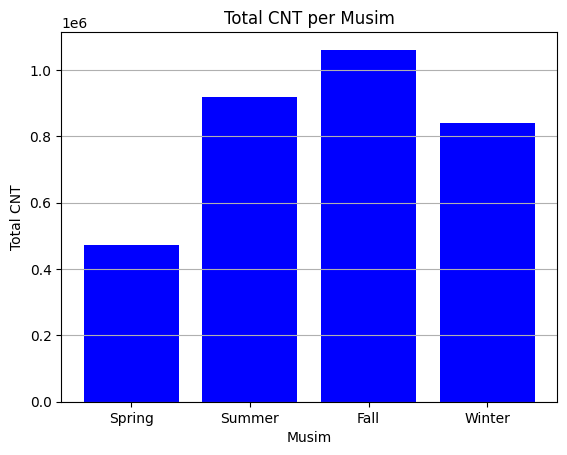

In [105]:
# Visualisasi menggunakan bar chart
plt.bar(data_musim['season'], data_musim['cnt'], color='blue')
plt.xlabel('Musim')
plt.ylabel('Total CNT')
plt.title('Total CNT per Musim')
plt.grid(axis='y')
plt.show()

Dari barchart di atas, Musim yang memiliki jumlah penyewa terbanyak adalah musim Fall yaitu musim gugur dan Musim yang memiliki jumlah penyewa tersedikit adalah Spring yaitu musim semi

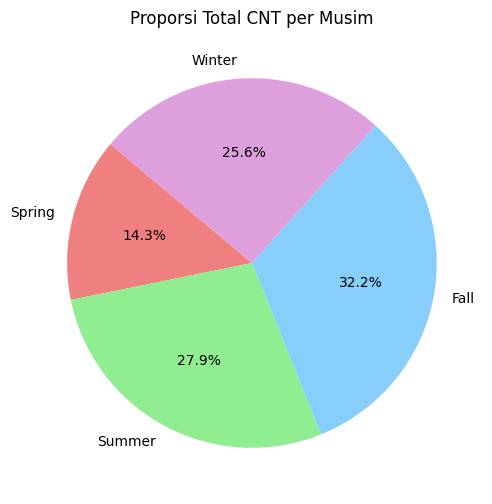

In [106]:
# Visualisasi menggunakan pie chart
plt.figure(figsize=(6, 6))
plt.pie(data_musim['cnt'], labels=data_musim['season'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightskyblue', 'plum'])
plt.title('Proporsi Total CNT per Musim')
plt.show()

Dapat dilihat juga dari proporsi jumlah penyewa, Musim Gugur yang memiliki penyewa terbanyak dan Musim Semi yang memiliki penyewa tersedikit

### 2. Bagaimana hubungan atau korelasi suhu (temp dan atemp), kelembapan, dan kecepatan angin terhadap jumlah pengguna sepeda? :

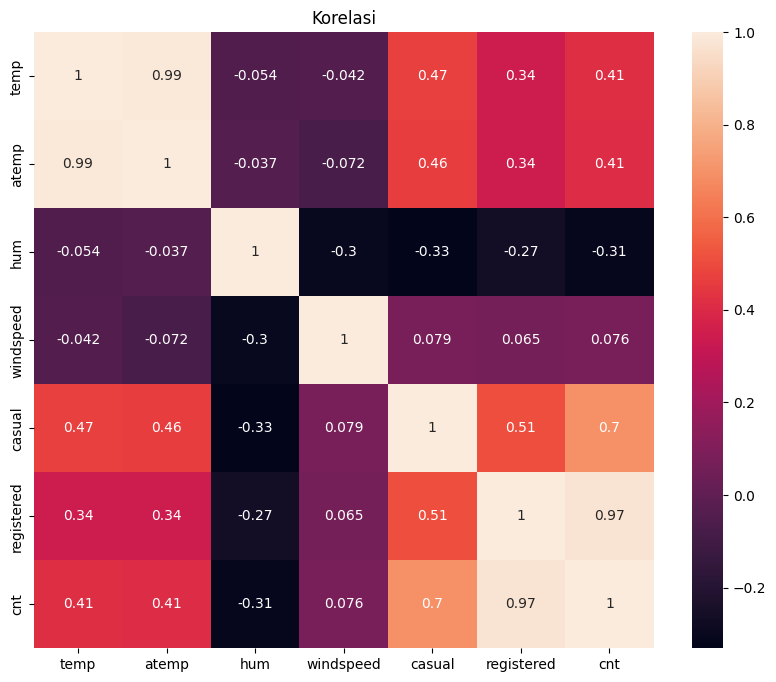

In [107]:
#Mencari nilai korelasi antara Usia dan Akreditasi
plt.figure(figsize=(10,8))
sns.heatmap(data2.corr(),annot=True)
plt.title('Korelasi')
plt.show()

Seperti yang terlihat dari heatmap diatas dapat diketahui bahwa
- Hubungan / Korelasi suhu (temp dan atemp) terhadap jumlah penyewa yaitu casual, registered, dan cnt memiliki nilai 0.47, 0.34, dan 0.41 yang berarti suhu memiliki pengaruh positif sedang atau korelasi positif sedang terhadap jumlah penyewa
- Hubungan / Korelasi  Kelembapan udara (hum) terhadap jumlah penyewa yaitu casual, registered, dan cnt memiliki nilai -0.33, -0.27, dan -0.31 yang berarti suhu memiliki pengaruh negatif lemah atau korelasi positif lemah terhadap jumlah penyewa
- Hubungan / Korelasi Kecepatan angin (windspeed) terhadap jumlah penyewa yaitu casual, registered, dan cnt memiliki nilai 0.079, 0.065, dan 0.076 yang berarti suhu memiliki pengaruh positif sangat lemah atau korelasi poitif sangat lemah terhadap jumlah penyewa.

### 3. Cuaca apakah yang memiliki jumlah penyewa sepeda terbanyak dan tersedikit? :

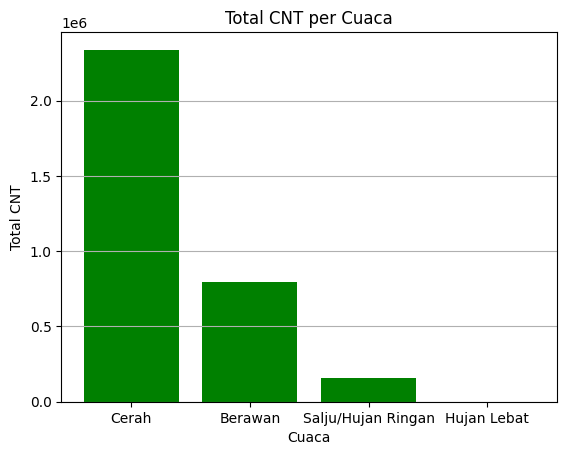

In [108]:
plt.bar(data_cuaca['weathersit'], data_cuaca['cnt'], color='green')
plt.xlabel('Cuaca')
plt.ylabel('Total CNT')
plt.title('Total CNT per Cuaca')
plt.grid(axis='y')
plt.show()

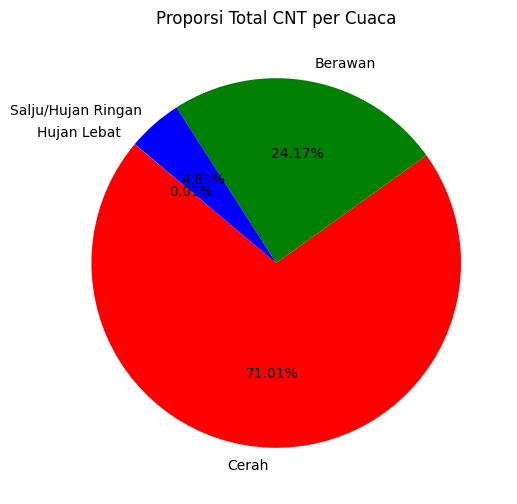

In [109]:
# Visualisasi menggunakan pie chart
plt.figure(figsize=(6, 6))
plt.pie(data_cuaca['cnt'], labels=data_cuaca['weathersit'], autopct='%1.2f%%', startangle=140, colors=['red', 'green', 'blue', 'yellow'])
plt.title('Proporsi Total CNT per Cuaca')
plt.show()

Dari gambar barchart dan piechart diatas dapat diketahui bahwa cuaca yang paling banyak didatangi penyewa adalah cuaca cerah, dan cuaca yang paling sedikit di datangi penyewa adalah cuaca Hujan lebat

### 4. Bagaimana pola perubahan jumlah penyewa pada setiap bulan pada tahun 2011 dan 2012? :

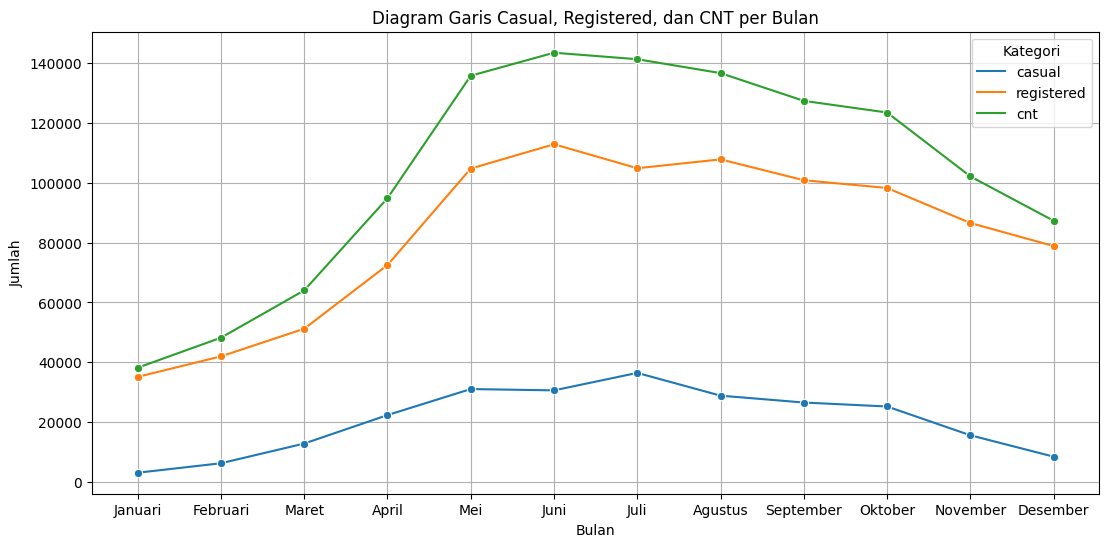

In [110]:
# Membentuk data dalam format panjang (tidy format)
df_long = pd.melt(data_2011, id_vars=['mnth'], value_vars=['casual', 'registered', 'cnt'],
                  var_name='Kategori', value_name='Jumlah')

# Visualisasi menggunakan diagram garis dengan Seaborn
plt.figure(figsize=(13, 6))
sns.lineplot(x='mnth', y='Jumlah', hue='Kategori', data=df_long, marker='o')

# Menambahkan label dan judul
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Diagram Garis Casual, Registered, dan CNT per Bulan pada Tahun 2011')

# Menampilkan diagram garis
plt.grid(True)
plt.show()

Dari gambar diagram garis tahun 2011 diatas dapat diketahui bahwa dari awal tahun sampai pertengahan tahun, jumlah penyewa mengalami peningkatan. akan tetapi dari pertengahan tahun sampai akhir tahun jumlah penyewa mengalami penurunan

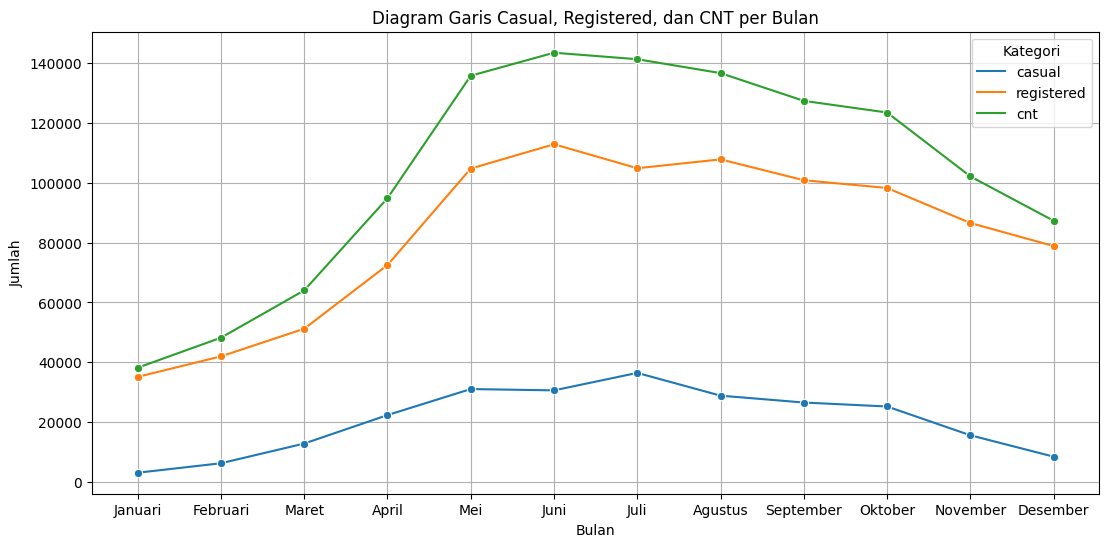

In [111]:
# Membentuk data dalam format panjang (tidy format)
df_long = pd.melt(data_2012, id_vars=['mnth'], value_vars=['casual', 'registered', 'cnt'],
                  var_name='Kategori', value_name='Jumlah')

# Visualisasi menggunakan diagram garis dengan Seaborn
plt.figure(figsize=(13, 6))
sns.lineplot(x='mnth', y='Jumlah', hue='Kategori', data=df_long, marker='o')

# Menambahkan label dan judul
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Diagram Garis Casual, Registered, dan CNT per Bulan pada Tahun 2012')

# Menampilkan diagram garis
plt.grid(True)
plt.show()

Dari gambar diagram garis tahun 2012 diatas dapat diketahui bahwa dari awal tahun sampai pertengahan tahun, jumlah penyewa mengalami peningkatan. akan tetapi dari pertengahan tahun sampai akhir tahun jumlah penyewa mengalami penurunan

## Conclusion

- Conclution pertanyaan 1 : Musim apakah yang memiliki jumlah penyewa sepeda terbanyak dan tersedikit?
  
  Jawab: Musim yang memiliki jumlah penyewa sepeda terbanyak adalah musim gugur dan musim yang memiliki jumlah penyewa tersedikit adalah musim semi

- Conclution pertanyaan 2 : Bagaimana hubungan atau korelasi suhu (temp dan atemp), kelembapan, dan kecepatan angin terhadap jumlah pengguna sepeda?

  Jawab: didapat 3 kesimpulan dari pertanyaan ini yaitu:
  - Hubungan/Korelasi suhu memiliki pengaruh positif sedang atau korelasi positif sedang terhadap jumlah penyewa
  - Hubungan/Korelasi Kelembapan udara memiliki pengaruh negatif lemah atau korelasi negatif lemah terhadap jumlah penyewa
  - Hubungan / Korelasi Kecepatan angin (windspeed) memiliki pengaruh positif sangat lemah atau korelasi poitif sangat lemah terhadap jumlah penyewa.

- Conclusion Pertanyaan 3: Cuaca apakah yang memiliki jumlah penyewa sepeda terbanyak dan tersedikit?
  
  Jawab: cuaca yang paling banyak didatangi penyewa adalah cuaca cerah, dan cuaca yang paling sedikit di datangi penyewa adalah cuaca Hujan lebat

- Conclusion Pertanyaan 4: Bagaimana pola perubahan jumlah penyewa pada setiap bulan pada tahun 2011 dan 2012?

  Jawab: Pola perubahan pada jumlah penyewa pada tahun 2011 adalah dari awal tahun sampai pertengahan tahun, jumlah penyewa mengalami peningkatan. akan tetapi dari pertengahan tahun sampai akhir tahun jumlah penyewa mengalami penurunan berlanjut sampai tahun 2012 yang mana polanya memiliki pola yang mirip dengan tahun 2011 yaitu dari awal tahun sampai pertengahan tahun, jumlah penyewa mengalami peningkatan. akan tetapi dari pertengahan tahun sampai akhir tahun jumlah penyewa mengalami penurunan.